In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [13]:
# Load the datasets using Pandas
fashion_train_df = pd.read_csv('fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

In [14]:
# Extract features and labels from the datasets
# refers to retrieving the target variable or the class labels from the dataset.
train_labels = fashion_train_df['label'].values
test_labels = fashion_test_df['label'].values

In [15]:
#This drops the 'label' column from the DataFrame, leaving only the pixel values of the images.
train_images = fashion_train_df.drop('label', axis=1).values.reshape(-1, 28, 28)
test_images  =  fashion_test_df.drop('label', axis=1).values.reshape(-1, 28, 28)

In [16]:
# Print shape of training and testing datasets after reshape
print("Training Images Shape (After Reshape):", train_images.shape)
print("Testing Images Shape (After Reshape):", test_images.shape)

Training Images Shape (After Reshape): (60000, 28, 28)
Testing Images Shape (After Reshape): (10000, 28, 28)


In [17]:
# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [18]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

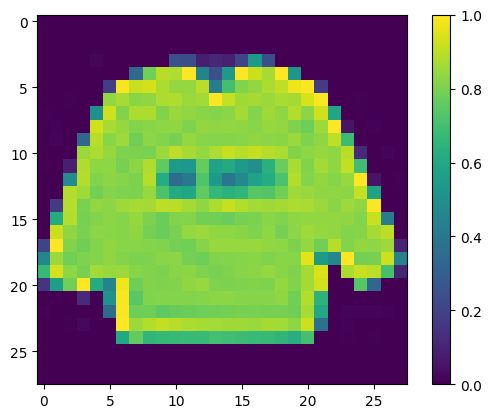

In [19]:
# Display an image from the dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7740 - loss: 0.6433
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8605 - loss: 0.3926
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8760 - loss: 0.3440
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8857 - loss: 0.3160
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8901 - loss: 0.2996
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8947 - loss: 0.2855
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9014 - loss: 0.2692
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9050 - loss: 0.2599
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9067 - loss: 0.2536
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9102 - loss: 0.2421


In [23]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8830 - loss: 0.3162
Test accuracy: 0.8881000280380249


In [24]:
# Make predictions
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


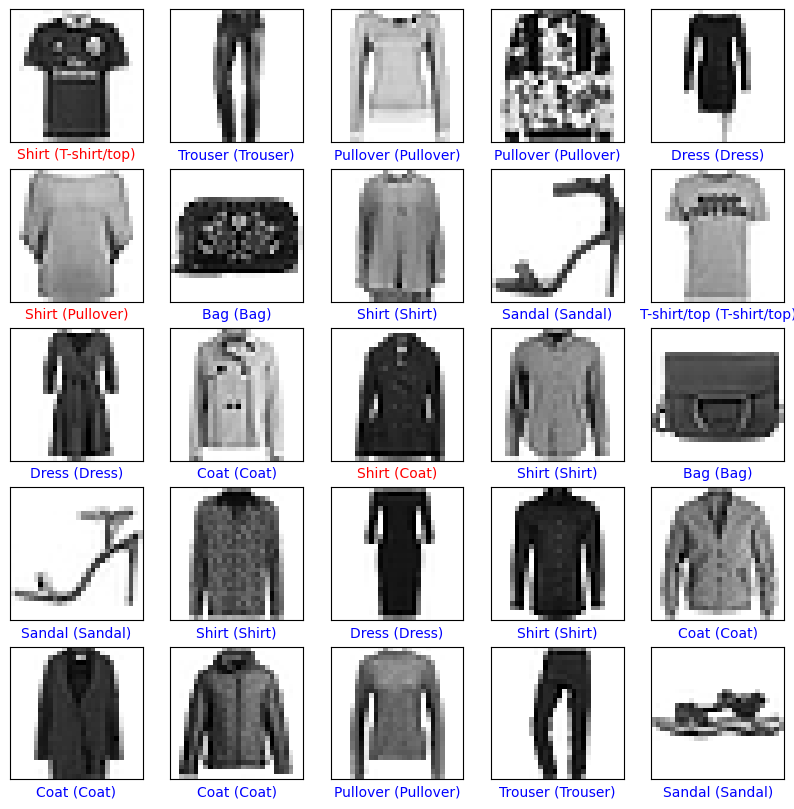

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    predicted_label = np.argmax(predictions[i])
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[test_labels[i]]})", color='blue' if predicted_label == test_labels[i] else 'red')
plt.show()

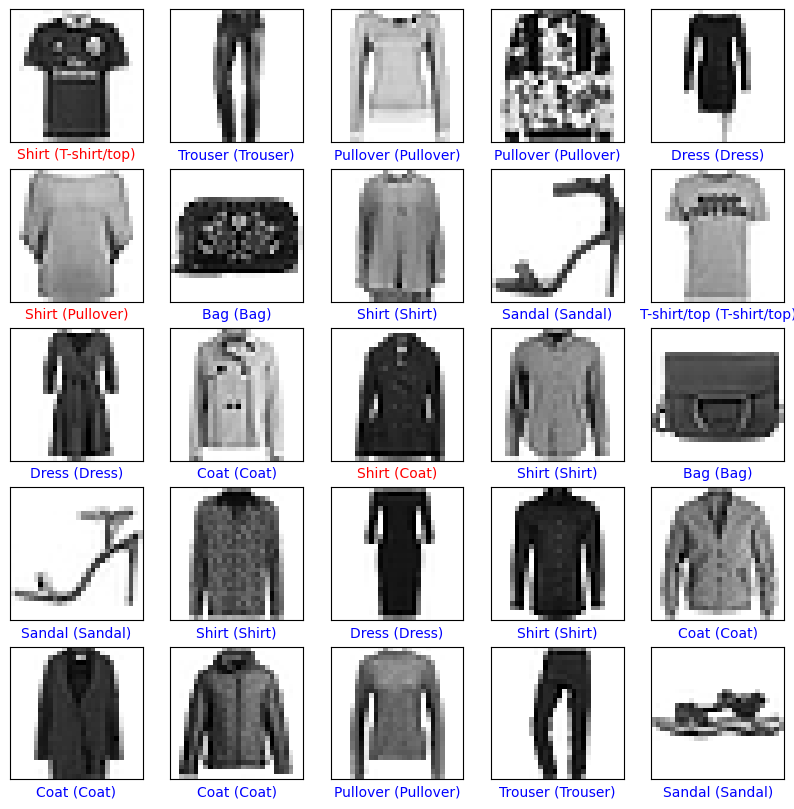

In [26]:
# Plot the first 25 test images and their predicted labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)
plt.show()

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Make predictions on the test set
predicted_labels = np.argmax(model.predict(test_images), axis=-1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)

# Calculate precision
precision = precision_score(test_labels, predicted_labels, average='weighted')

# Calculate recall
recall = recall_score(test_labels, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8881
Precision: 0.8904154836306065
Recall: 0.8881
